In [112]:
import numpy as np
import random
random.seed(5)

In [113]:
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

def DMD4cast(data, r, pred_step):
    N, T = data.shape
    _, _, A = DMD(data, r)
    mat = np.append(data, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = (A @ mat[:, T + s - 1]).real
    return mat[:, - pred_step :]

In [114]:
data = np.load("1951_2000.npy")
train_years = 30
train_data = data[:, :train_years*12]
train_data

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  61.50000215, ..., 228.10000038,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        , 421.29999113, ..., 184.47213122,
          9.09456295,   1.58333023],
       [  0.        ,   0.        , 421.29999113, ..., 181.08390257,
          8.92485258,   1.67467144],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [115]:
u, s, v = np.linalg.svd(train_data, full_matrices = False)
s

array([1.09440140e+05, 2.48140659e+04, 2.35223341e+04, 1.45335869e+04,
       1.20286016e+04, 1.00712948e+04, 8.95095729e+03, 8.22658506e+03,
       7.90340946e+03, 7.60499805e+03, 6.92005010e+03, 6.47691684e+03,
       6.37902945e+03, 6.24645262e+03, 5.87202409e+03, 5.28808304e+03,
       4.89300905e+03, 4.77513666e+03, 4.61346773e+03, 4.41841517e+03,
       4.14374404e+03, 4.03777678e+03, 3.92276464e+03, 3.66953598e+03,
       3.55063397e+03, 3.48136117e+03, 3.25605236e+03, 3.13938588e+03,
       3.03528449e+03, 2.89851496e+03, 2.75187873e+03, 2.71370309e+03,
       2.57810113e+03, 2.52682115e+03, 2.37168343e+03, 2.32971853e+03,
       2.31805838e+03, 2.21026322e+03, 2.11927978e+03, 2.00664879e+03,
       1.97145370e+03, 1.92900795e+03, 1.85366818e+03, 1.84116511e+03,
       1.82466530e+03, 1.76230934e+03, 1.71558121e+03, 1.65923702e+03,
       1.63899797e+03, 1.61962823e+03, 1.55150087e+03, 1.53822180e+03,
       1.48945966e+03, 1.46656943e+03, 1.43405623e+03, 1.39411601e+03,
      

In [116]:
# c = DMD(data,419) # 109
# c

In [117]:
test_years = 5
rank = 50

test_data = data[:, train_years*12:train_years*12+test_years*12]
test_data

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 16.09999967,   2.4000001 ,  91.20000625, ...,  14.00000048,
          3.50000024,   3.50000024],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [132.38524342, 287.97615671, 503.03959057, ...,  39.7770309 ,
         19.53356649, 135.37418831],
       [131.36318111, 282.39567053, 496.86885779, ...,  40.81786884,
         21.68709291, 141.4981546 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [118]:
preds = DMD4cast(train_data, rank, test_years*12)
preds

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.96684874e+00, 4.83160946e+00, 4.30512389e+00, ...,
        9.06273327e-04, 7.73028861e-04, 6.59185173e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.59017243e+00, 1.96294655e+00, 1.22198669e+00, ...,
        4.21513204e-04, 3.63685660e-04, 3.13626627e-04],
       [2.52791226e+00, 1.90244146e+00, 1.17471014e+00, ...,
        4.15920377e-04, 3.58819904e-04, 3.09396709e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [119]:
import matplotlib.pyplot as plt

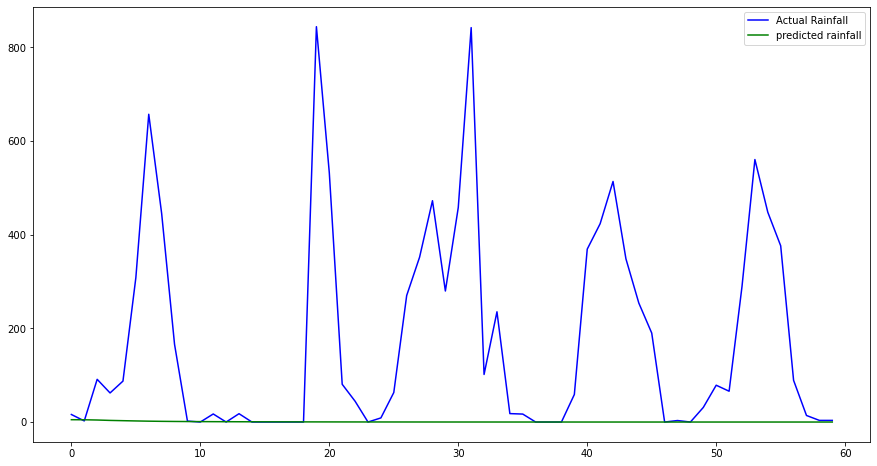

In [120]:
location = 4

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(test_data[location, :], color="blue", label = "Actual Rainfall" )
ax.plot(preds[location,:], color="green", label="predicted rainfall")
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
mean_squared_error(test_data, preds)

111995.6844953521

In [123]:
mean_absolute_error(test_data, preds)

209.0299891062082

In [124]:
# true_preds = np.load("2001_2018.npy")
# true_preds[:, :12]

# Small data

In [125]:
data.shape

(435, 600)

In [126]:
small_train = data[:50, :50]
small_test = data[:50, 50:51]
small_train

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  61.50000215, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        , 117.64233729, ...,   0.        ,
          4.64319122,   0.99983348],
       [  0.        ,   0.        ,  74.59704378, ...,   0.26967214,
          5.40623412,   4.62839667],
       [  0.        ,   0.        ,  49.03306407, ...,   0.3667803 ,
          5.71954858,   5.47712752]])

In [127]:
small_test

array([[  0.        ],
       [ 81.29999828],
       [  0.        ],
       [  0.        ],
       [ 81.29999352],
       [  0.        ],
       [  0.        ],
       [ 81.29134083],
       [ 81.29999828],
       [  0.        ],
       [ 77.20639522],
       [ 80.71271515],
       [ 81.29999828],
       [  0.        ],
       [ 55.90238154],
       [ 69.87732092],
       [ 68.51609096],
       [ 73.78373609],
       [ 95.97506359],
       [253.0821225 ],
       [251.7155863 ],
       [  0.        ],
       [ 69.28151545],
       [ 63.92251602],
       [ 65.10700527],
       [197.12628353],
       [278.43192266],
       [267.96123508],
       [252.9850504 ],
       [181.06830649],
       [  0.        ],
       [ 59.5867465 ],
       [ 72.61657429],
       [136.20998919],
       [250.96338618],
       [297.09818518],
       [279.92529847],
       [271.80118209],
       [240.8481262 ],
       [166.69192123],
       [ 38.73091996],
       [158.71594536],
       [218.03509057],
       [291

In [128]:
pred_small = DMD4cast(small_train, 20, 1)
pred_small

array([[ 0.        ],
       [ 2.2289224 ],
       [ 0.        ],
       [ 0.        ],
       [ 2.22892247],
       [ 0.        ],
       [ 0.        ],
       [ 2.27119117],
       [ 2.22892267],
       [ 0.        ],
       [-0.13751035],
       [ 2.10662057],
       [ 2.22892253],
       [ 0.        ],
       [-1.52926321],
       [-1.050309  ],
       [-1.37570637],
       [-2.07771822],
       [-1.91731122],
       [-4.70398995],
       [-6.95999091],
       [ 0.        ],
       [-2.51403532],
       [-2.50571236],
       [-2.55824291],
       [-2.19963136],
       [-4.13941767],
       [-4.4219137 ],
       [-4.98014669],
       [-5.16270974],
       [ 0.        ],
       [-1.90057511],
       [-2.0405997 ],
       [-1.18807384],
       [-1.84527764],
       [-2.81550132],
       [-4.21720739],
       [-4.36069972],
       [-4.59326154],
       [-4.37864987],
       [ 0.83765812],
       [ 0.48821637],
       [-0.31502061],
       [-1.30270522],
       [-3.07383572],
       [-4

In [129]:
mean_squared_error(small_test, pred_small)

28727.560153090442